# Predicting Plant Health Based on Leaf Attributes

Problem Description:
Suppose you are starting a company that specializes in monitoring plant health for large-scale agricultural operations or individual gardens. To manage this, you need a system to assess the health of plants based on the physical characteristics of their leaves.

Task:
Using existing data on various plants, develop a model to predict whether a plant is healthy or diseased based on attributes such as leaf color, leaf spots, and texture.

# Data Set

Your dataset consists of examples of different plant leaves. For each example, you have the following features:

Leaf Color: Green, Yellow, Brown \\
Leaf Spots: None, Small, Large \\
Texture: Smooth, Rough \\
Healthy: 1 (healthy), 0 (diseased) \\



|    | Leaf Color | Leaf Spots | Texture | Healthy |
|----|------------|------------|---------|---------|
| 0  | Green      | None       | Smooth  | 1       |
| 1  | Yellow     | Small      | Rough   | 0       |
| 2  | Brown      | Large      | Smooth  | 0       |
| 3  | Green      | None       | Rough   | 1       |
| 4  | Yellow     | None       | Smooth  | 1       |
| 5  | Brown      | Small      | Rough   | 0       |
| 6  | Green      | Large      | Rough   | 0       |
| 7  | Yellow     | Large      | Smooth  | 0       |
| 8  | Green      | Small      | Smooth  | 1       |
| 9  | Brown      | None       | Rough   | 0       |

## One hot encoded dataset

|    | Green Leaf | Yellow Leaf | Brown Leaf | No Spots | Small Spots | Large Spots | Smooth Texture | Rough Texture | Healthy |
|----|------------|-------------|------------|----------|-------------|-------------|----------------|---------------|---------|
| 0  | 1          | 0           | 0          | 1        | 0           | 0           | 1              | 0             | 1       |
| 1  | 0          | 1           | 0          | 0        | 1           | 0           | 0              | 1             | 0       |
| 2  | 0          | 0           | 1          | 0        | 0           | 1           | 1              | 0             | 0       |
| 3  | 1          | 0           | 0          | 1        | 0           | 0           | 0              | 1             | 1       |
| 4  | 0          | 1           | 0          | 1        | 0           | 0           | 1              | 0             | 1       |
| 5  | 0          | 0           | 1          | 0        | 1           | 0           | 0              | 1             | 0       |
| 6  | 1          | 0           | 0          | 0        | 0           | 1           | 0              | 1             | 0       |
| 7  | 0          | 1           | 0          | 0        | 0           | 1           | 1              | 0             | 0       |
| 8  | 1          | 0           | 0          | 0        | 1           | 0           | 1              | 0             | 1       |
| 9  | 0          | 0           | 1          | 1        | 0           | 0           | 0              | 1             | 0       |

In [1]:
import numpy as np

# Define the features in X_train where each row corresponds to an example.
X_train = np.array([
    [1, 0, 0, 1, 0, 0, 1, 0],
    [0, 1, 0, 0, 1, 0, 0, 1],
    [0, 0, 1, 0, 0, 1, 1, 0],
    [1, 0, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 0, 1, 0, 1],
    [0, 1, 0, 0, 0, 1, 1, 0],
    [1, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 1, 1, 0, 0, 0, 1]
])

# Define the labels in y_train where each value corresponds to whether the plant is healthy.
y_train = np.array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

# Display the arrays
print("X_train:\n", X_train)
print("y_train:\n", y_train)

X_train:
 [[1 0 0 1 0 0 1 0]
 [0 1 0 0 1 0 0 1]
 [0 0 1 0 0 1 1 0]
 [1 0 0 1 0 0 0 1]
 [0 1 0 1 0 0 1 0]
 [0 0 1 0 1 0 0 1]
 [1 0 0 0 0 1 0 1]
 [0 1 0 0 0 1 1 0]
 [1 0 0 0 1 0 1 0]
 [0 0 1 1 0 0 0 1]]
y_train:
 [1 0 0 1 1 0 0 0 1 0]


In [2]:
print ('The shape of X_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(X_train))

The shape of X_train is: (10, 8)
The shape of y_train is:  (10,)
Number of training examples (m): 10


# Calculate entropy

$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$

In [3]:
def compute_entropy(y):
  """
  y (ndarray): Numpy array indicating whether each example at a node is
           healthy(1) or diseased(0)
  Returns :
  entropy : Entropy at the node
  """
  entropy = 0.

  if len(y) != 0:
    p = len(y[y == 1]) / len(y)

    if p == 0 or p == 1:
      return 0
    entropy =  - p * np.log2(p) - (1 - p) * np.log2(1 - p)

  return entropy



# Split dataset

Takes in the data at a node and a feature to split on and splits it into left and right branches

For example, say we're starting at the root node (so `node_indices = [0,1,2,3,4,5,6,7,8,9]`), and we chose to split on feature `0`, which is whether or not the example has green leaf.   
    The output of the function is then
    
    left_indices = [0, 3, 6, 8](data points which has green leaf) and
    
    right_indices = [1, 2, 4, 5, 7, 9](data points which does not have a green leaft)

In [4]:
def split_dataset(X, node_indices, feature):
    """
    X (ndarray):             Data matrix of shape(n_samples, n_features)
    node_indices (list):     List containing the active indices. I.e, the samples being considered at this step.
    feature (int):           Index of feature to split on

    Returns:
        left_indices (list):     Indices with feature value == 1
        right_indices (list):    Indices with feature value == 0
    """
    left_indices = []
    right_indices = []

    for i in node_indices:
        if X[i][feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)

    return left_indices, right_indices

# Information Gain

$$\text{Information Gain} = H(p_1^\text{node})- (w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$

In [5]:
def compute_information_gain(X, y, node_indices, feature):

    """
    X (ndarray):            Data matrix of shape(n_samples, n_features)
    y (array like):         list or ndarray with n_samples containing the target variable
    node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
    feature (int):           Index of feature to split on

    Returns:
        cost (float):        Cost computed

    """
    # Split dataset
    left_indices, right_indices = split_dataset(X, node_indices, feature)

    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]

    root_entropy = compute_entropy(y_node)
    left_entropy = compute_entropy(y_left)
    right_entropy = compute_entropy(y_right)

    w_left = len(X_left) / len(X_node)
    w_right = len(X_right) / len(X_node)


    information_gain = root_entropy - (w_left * left_entropy + w_right * right_entropy)

    return information_gain

# Get Best Split

In [6]:
def get_best_split(X, y, node_indices):
    """
    X (ndarray):            Data matrix of shape(n_samples, n_features)
    y (array like):         list or ndarray with n_samples containing the target variable
    node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.

    Returns:
        best_feature (int):     The index of the best feature to split
    """

    num_features = X.shape[1]

    best_feature = -1

    max_info_gain = 0

    for feature in range(num_features):
        info_gain = compute_information_gain(X, y, node_indices, feature)

        if info_gain >  max_info_gain:
            max_info_gain =  info_gain
            best_feature =  feature

    return best_feature

In [7]:
tree = []
def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth):
    """
    X (ndarray):            Data matrix of shape(n_samples, n_features)
    y (array like):         list or ndarray with n_samples containing the target variable
    node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
    branch_name (string):   Name of the branch. ['Root', 'Left', 'Right']
    max_depth (int):        Max depth of the resulting tree.
    current_depth (int):    Current depth. Parameter used during recursive call.

    """
    if current_depth == max_depth or not node_indices:
        formatting = " " * current_depth + "-" * current_depth
        print(formatting, f"{branch_name} leaf node with indices: {node_indices} | Majority class: {np.bincount(y[node_indices]).argmax() if node_indices else 'N/A'}")
        return

    if np.all(y[node_indices] == y[node_indices][0]):
        print(" " * current_depth + "-" * current_depth, f"{branch_name} leaf node with indices: {node_indices} | Uniform class: {y[node_indices][0]}")
        return

    best_feature = get_best_split(X, y, node_indices)
    if best_feature == -1:
        print(" " * current_depth + "-" * current_depth, f"{branch_name} leaf node with indices: {node_indices} | No information gain")
        return

    left_indices, right_indices = split_dataset(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))

    formatting = "-" * current_depth
    print(f"{formatting} Depth {current_depth}, {branch_name}: Split on feature: {best_feature}")

    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth+1)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth+1)



In [8]:
root_indices = list(range(len(y_train)))
build_tree_recursive(X_train, y_train, root_indices, "Root", max_depth=2, current_depth=0)


 Depth 0, Root: Split on feature: 2
 - Left leaf node with indices: [2, 5, 9] | Uniform class: 0
- Depth 1, Right: Split on feature: 3
  -- Left leaf node with indices: [0, 3, 4] | Majority class: 1
  -- Right leaf node with indices: [1, 6, 7, 8] | Majority class: 0


# Scikit Learn Implementation

[Scikit-learn implementation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

Hyperparameters:


 - min_samples_split: The minimum number of samples required to split an internal node.
   - Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
 - max_depth: The maximum depth of the tree.
   - Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

In [9]:
from sklearn import tree

# You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
decision_tree_model = tree.DecisionTreeClassifier(min_samples_split = 3,
                                             max_depth = 3).fit(X_train,y_train)

In [10]:
from sklearn.metrics import accuracy_score

print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")

Metrics train:
	Accuracy score: 0.9000


[Text(0.5, 0.8333333333333334, 'x[3] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.5, 'x[0] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.5, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

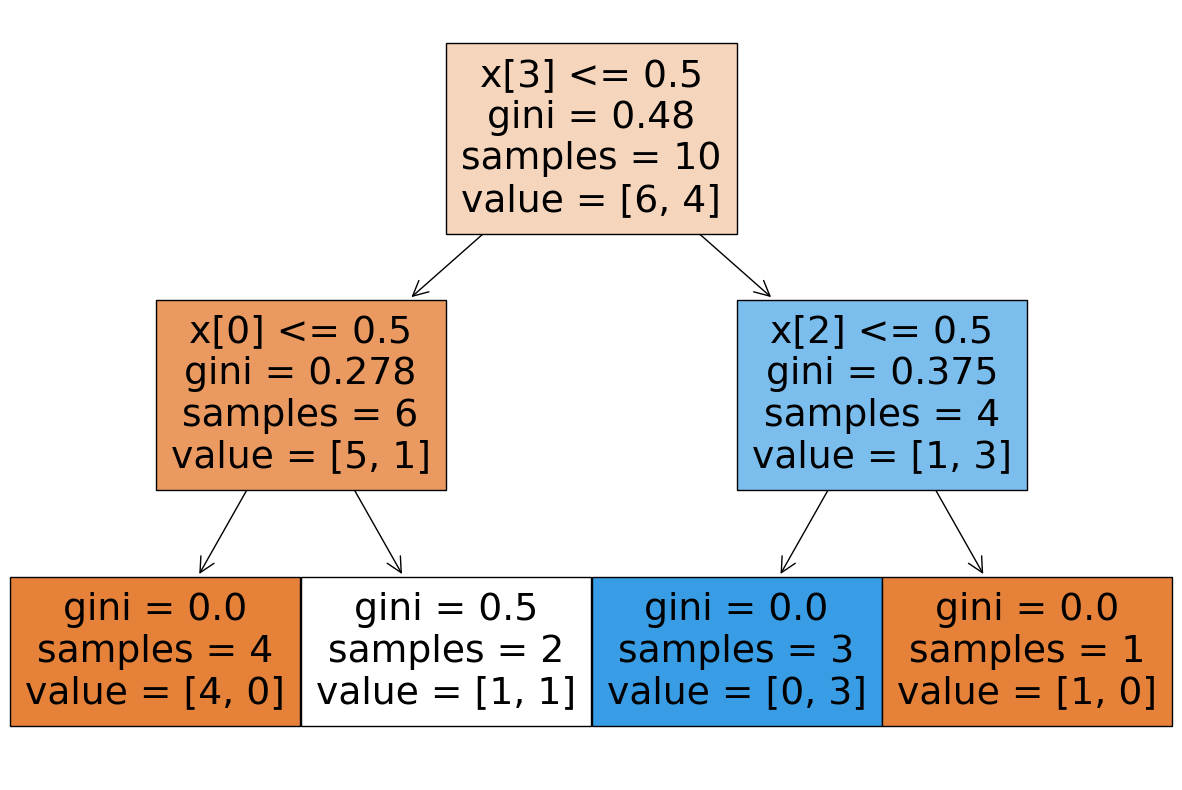

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
tree.plot_tree(decision_tree_model, filled = True)

In [14]:
print(tree.export_text(decision_tree_model))

|--- feature_3 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- class: 0
|--- feature_3 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 1
|   |--- feature_2 >  0.50
|   |   |--- class: 0

